In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


import os

In [2]:
df = pd.read_csv("./data/clusters_main.txt", sep=" ")

df

8000           2
0      68.601997  102.491997
1     454.665985  264.808990
2     101.283997  169.285995
3     372.614990  263.140991
4     300.989014   46.555000
...          ...         ...
7995  442.420990  303.721985
7996  495.451996  288.502991
7997  267.605011  141.725006
7998  238.358002  252.729996
7999  159.242004  177.431000

[8000 rows x 2 columns]

In [3]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

normalized_df.to_csv('normalize.csv', index=False)

In [4]:
dff = pd.read_csv("./normalize.csv", sep=",")
dff

8000         2
0     0.086988  0.270828
1     0.709356  0.812800
2     0.139674  0.493851
3     0.577083  0.807231
4     0.461616  0.084055
...        ...       ...
7995  0.689616  0.942730
7996  0.775106  0.891914
7997  0.407798  0.401826
7998  0.360649  0.772469
7999  0.233107  0.521047

[8000 rows x 2 columns]

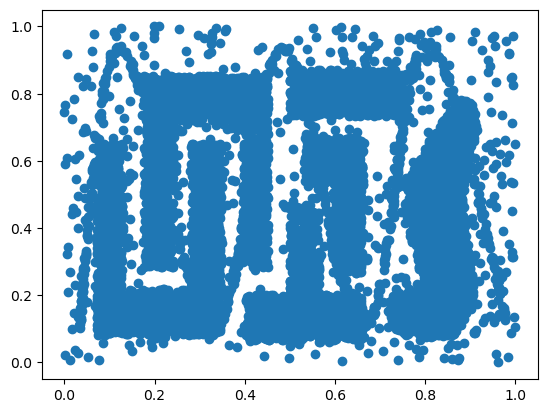

In [5]:
plt.scatter(dff['8000'], dff['2'])
plt.show()

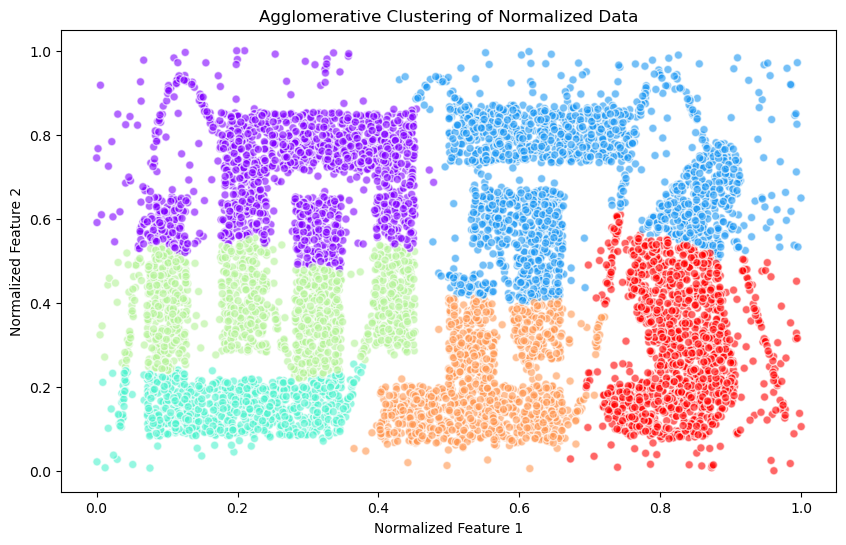

In [6]:
linkedd = linkage(dff, 'ward', 'euclidean')
threshold = 6  # Adjust this threshold as needed
cluster_labels = fcluster(linkedd, threshold, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("Agglomerative Clustering of Normalized Data")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.show()

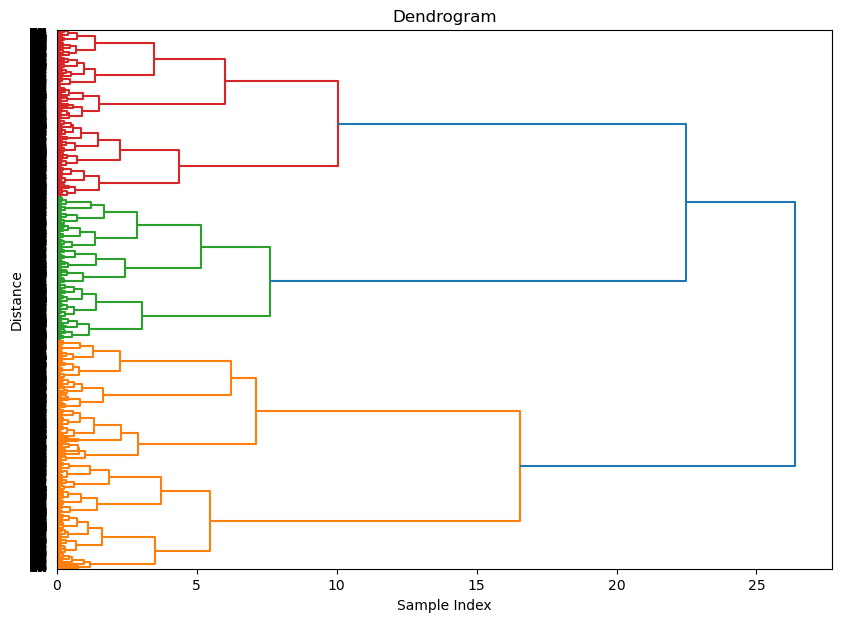

In [7]:
plt.figure(figsize=(10, 7))
dendrogram(linkedd, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [8]:
linkedd[:2000]

array([[4.48800000e+03, 6.01000000e+03, 2.55377698e-05, 2.00000000e+00],
       [2.90100000e+03, 3.51200000e+03, 3.08796082e-05, 2.00000000e+00],
       [8.89000000e+02, 1.40400000e+03, 8.86071296e-05, 2.00000000e+00],
       ...,
       [1.78100000e+03, 6.24900000e+03, 3.74976420e-03, 2.00000000e+00],
       [2.46600000e+03, 3.58600000e+03, 3.74997357e-03, 2.00000000e+00],
       [2.20900000e+03, 8.86000000e+03, 3.75064484e-03, 3.00000000e+00]])

In [9]:
dff['cluster'] = fcluster(linkedd, 6, criterion='maxclust')
dff.groupby('cluster').size()

cluster
1    1600
2    1805
3     832
4    1296
5    1129
6    1338
dtype: int64

In [10]:
dff.groupby('cluster').mean()

8000         2
cluster                    
1        0.282551  0.705358
2        0.683675  0.687487
3        0.202127  0.153603
4        0.251492  0.387554
5        0.552449  0.208344
6        0.825629  0.295509

In [11]:
dist = linkedd[:, 2]
dist

array([2.55377698e-05, 3.08796082e-05, 8.86071296e-05, ...,
       1.65372770e+01, 2.24746085e+01, 2.63728409e+01])

Text(0, 0.5, 'Distance')

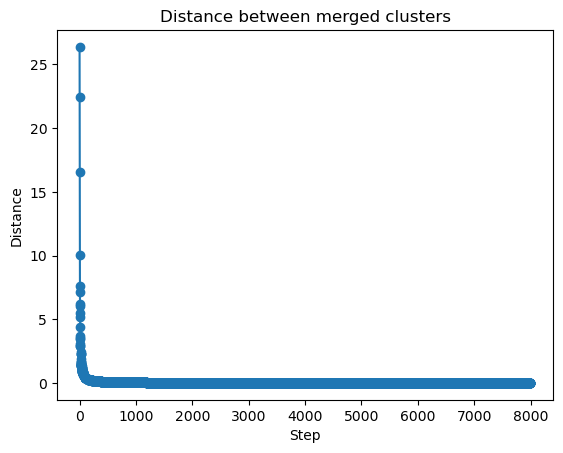

In [12]:


dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

_________________________________________________________________________________________________

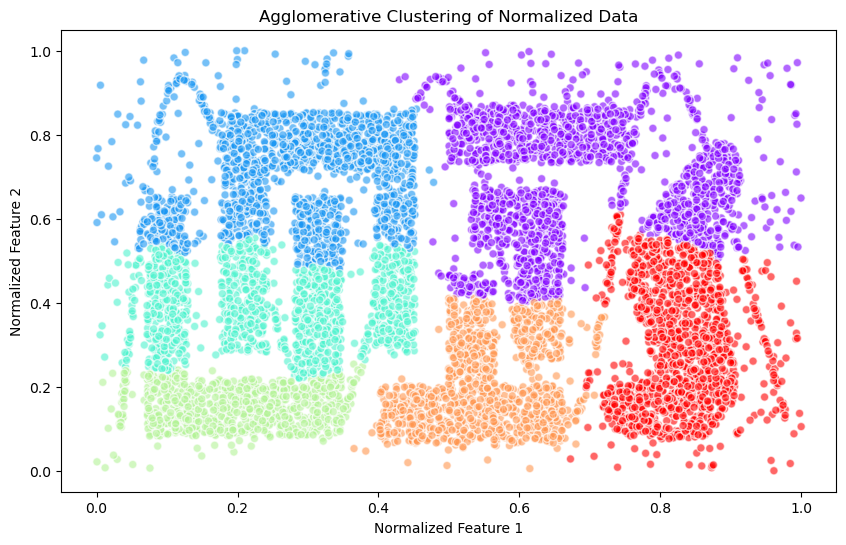

In [13]:
linkedd = linkage(dff, 'single', 'euclidean')
threshold = 6  # Adjust this threshold as needed
cluster_labels = fcluster(linkedd, threshold, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("Agglomerative Clustering of Normalized Data")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.show()

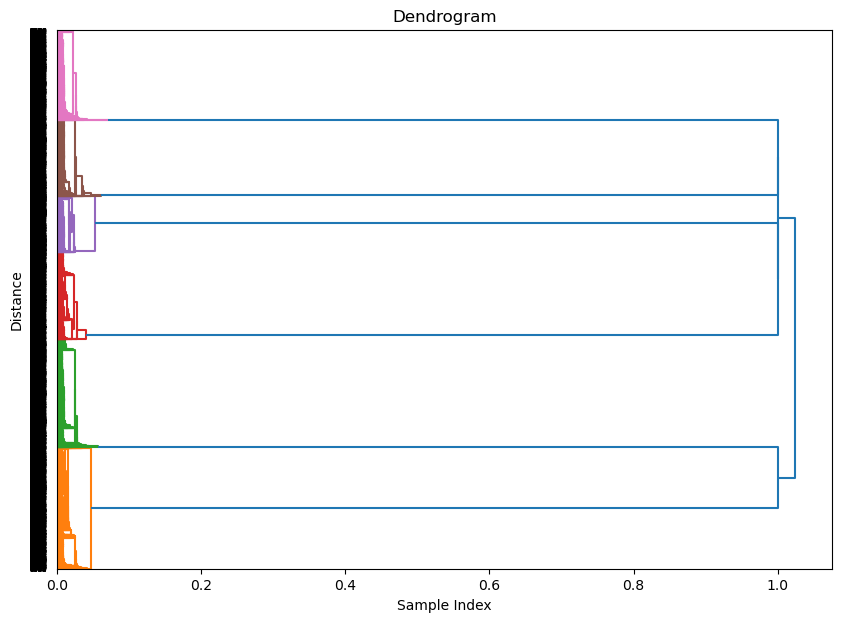

In [14]:
plt.figure(figsize=(10, 7))
dendrogram(linkedd, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [15]:
linkedd[:2000]

array([[4.48800000e+03, 6.01000000e+03, 2.55377698e-05, 2.00000000e+00],
       [2.90100000e+03, 3.51200000e+03, 3.08796082e-05, 2.00000000e+00],
       [8.89000000e+02, 1.40400000e+03, 8.86071296e-05, 2.00000000e+00],
       ...,
       [3.23000000e+03, 4.71600000e+03, 3.26276359e-03, 2.00000000e+00],
       [6.15800000e+03, 8.66400000e+03, 3.26352346e-03, 4.00000000e+00],
       [8.91700000e+03, 9.73000000e+03, 3.26433957e-03, 5.00000000e+00]])

In [16]:
dff['cluster'] = fcluster(linkedd, 6, criterion='maxclust')
dff.groupby('cluster').size()

cluster
1    1805
2    1600
3    1296
4     832
5    1129
6    1338
dtype: int64

In [17]:
dff.groupby('cluster').mean()

8000         2
cluster                    
1        0.683675  0.687487
2        0.282551  0.705358
3        0.251492  0.387554
4        0.202127  0.153603
5        0.552449  0.208344
6        0.825629  0.295509

In [18]:
dist = linkedd[:, 2]
dist

array([2.55377698e-05, 3.08796082e-05, 8.86071296e-05, ...,
       1.00010425e+00, 1.00058274e+00, 1.02374911e+00])

Text(0, 0.5, 'Distance')

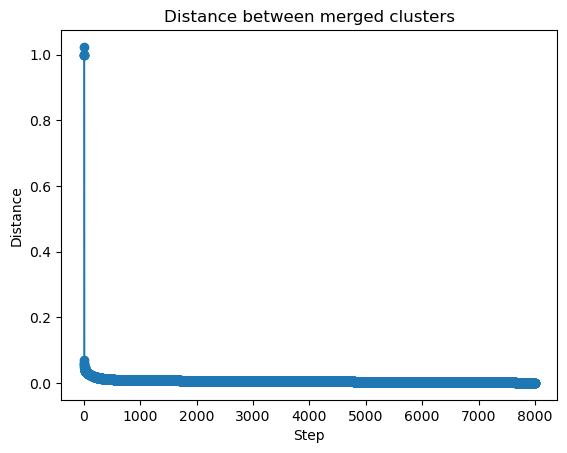

In [19]:


dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

_________________________________________________________________________________________________

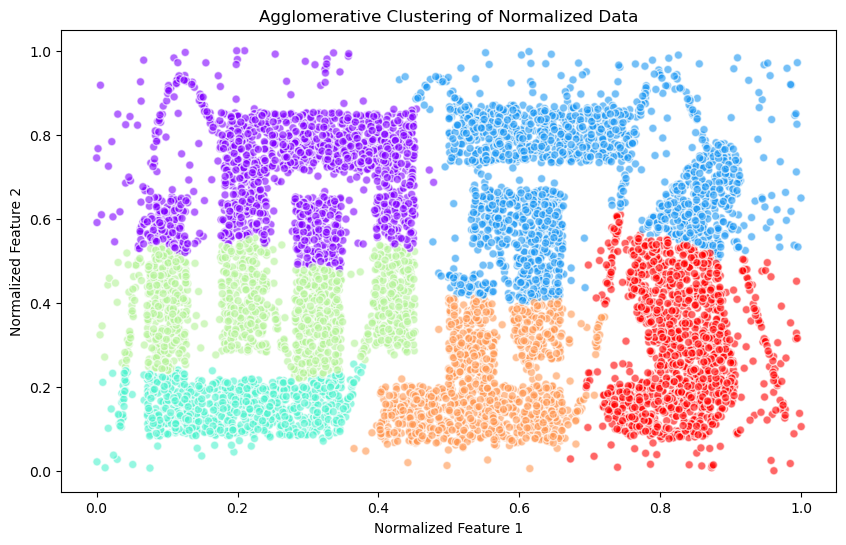

In [20]:
linkedd = linkage(dff, 'complete', 'euclidean')
threshold = 6  # Adjust this threshold as needed
cluster_labels = fcluster(linkedd, threshold, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("Agglomerative Clustering of Normalized Data")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.show()

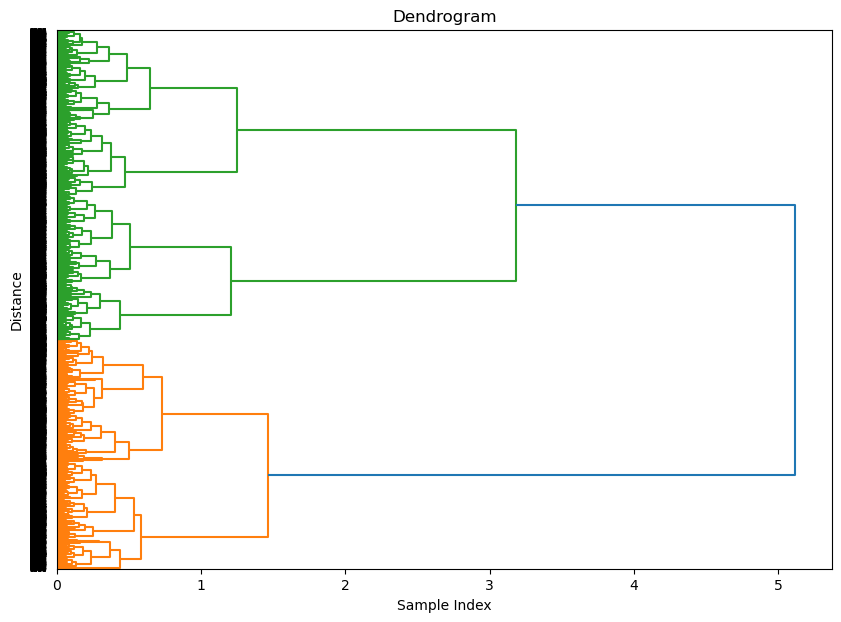

In [21]:
plt.figure(figsize=(10, 7))
dendrogram(linkedd, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [22]:
linkedd[:2000]

array([[4.48800000e+03, 6.01000000e+03, 2.55377698e-05, 2.00000000e+00],
       [2.90100000e+03, 3.51200000e+03, 3.08796082e-05, 2.00000000e+00],
       [8.89000000e+02, 1.40400000e+03, 8.86071296e-05, 2.00000000e+00],
       ...,
       [3.46900000e+03, 9.11900000e+03, 3.74946928e-03, 3.00000000e+00],
       [1.78100000e+03, 6.24900000e+03, 3.74976420e-03, 2.00000000e+00],
       [2.46600000e+03, 3.58600000e+03, 3.74997357e-03, 2.00000000e+00]])

In [23]:
dff['cluster'] = fcluster(linkedd, 6, criterion='maxclust')
dff.groupby('cluster').size()

cluster
1    1600
2    1805
3     832
4    1296
5    1129
6    1338
dtype: int64

In [24]:
dff.groupby('cluster').mean()

8000         2
cluster                    
1        0.282551  0.705358
2        0.683675  0.687487
3        0.202127  0.153603
4        0.251492  0.387554
5        0.552449  0.208344
6        0.825629  0.295509

In [25]:
dist = linkedd[:, 2]
dist

array([2.55377698e-05, 3.08796082e-05, 8.86071296e-05, ...,
       1.46048298e+00, 3.18423539e+00, 5.11449952e+00])

Text(0, 0.5, 'Distance')

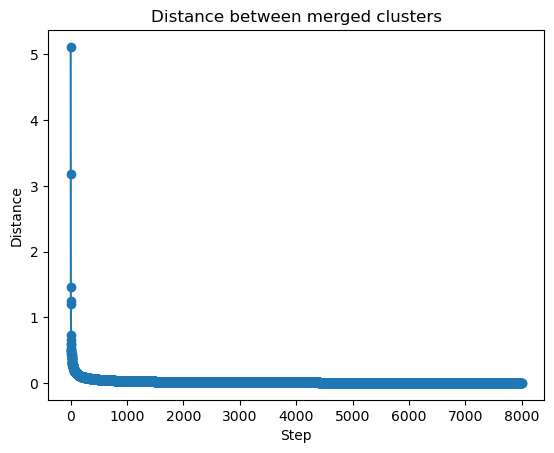

In [26]:


dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

_________________________________________________________________________________________________

В ходе лабораторной работы мы призвели несколько методов кластреризации и определили метод Уорда как оптимальный, поскольку так как он использует Евклидовы метрики, он наиболее подходит для данных, которые можно предстаить в виде точек на плоскости. 
Особенности:
    Метод Уорда:
    Наиболее сбалансированный переход дистанций между кластерами от итерации к итерации.
    Метод single:
     Резкий переход дистанций между кластерами на последнихитерациях.
    Метод complete: 
     Сбалансированный переход дистанций между кластерами от итерации к итерации, однако наблюдается "дублирование" в дистанциях между кластерами.

_________________________________________________________________________________________________

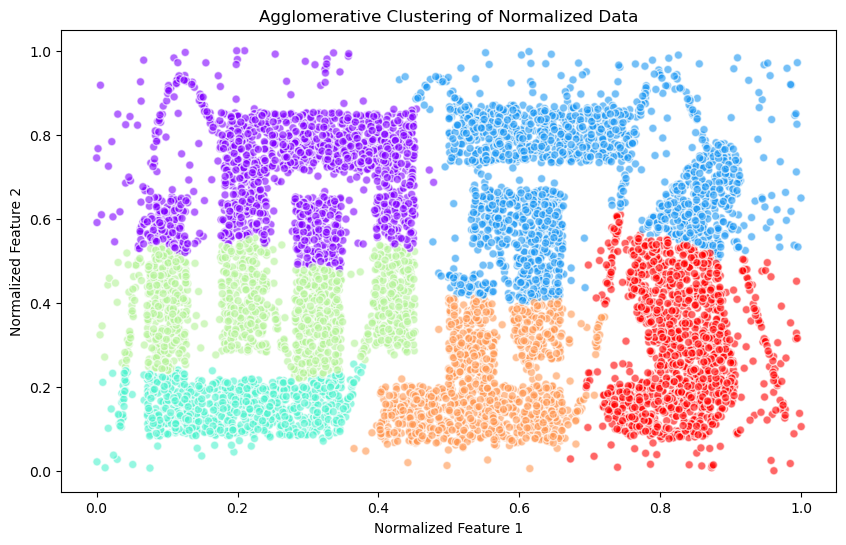

In [27]:
linkedd = linkage(dff, 'average', 'euclidean')
threshold = 6  # Adjust this threshold as needed
cluster_labels = fcluster(linkedd, threshold, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("Agglomerative Clustering of Normalized Data")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.show()

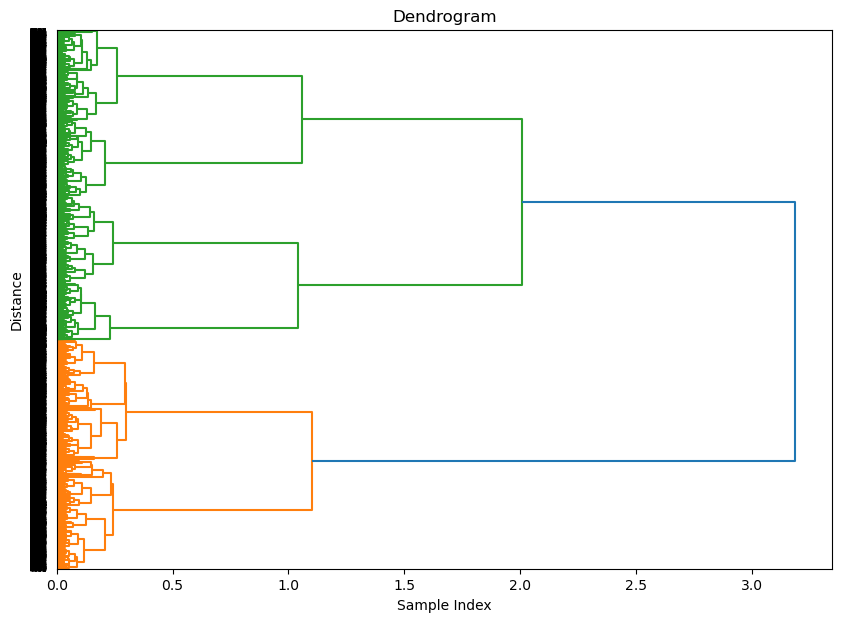

In [28]:
plt.figure(figsize=(10, 7))
dendrogram(linkedd, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [29]:
linkedd[:2000]

array([[4.48800000e+03, 6.01000000e+03, 2.55377698e-05, 2.00000000e+00],
       [2.90100000e+03, 3.51200000e+03, 3.08796082e-05, 2.00000000e+00],
       [8.89000000e+02, 1.40400000e+03, 8.86071296e-05, 2.00000000e+00],
       ...,
       [4.08400000e+03, 8.97200000e+03, 3.58996410e-03, 3.00000000e+00],
       [2.55100000e+03, 6.04300000e+03, 3.59128534e-03, 2.00000000e+00],
       [2.47000000e+02, 4.26200000e+03, 3.59233057e-03, 2.00000000e+00]])

In [30]:
dff['cluster'] = fcluster(linkedd, 6, criterion='maxclust')
dff.groupby('cluster').size()

cluster
1    1600
2    1805
3     832
4    1296
5    1129
6    1338
dtype: int64

In [31]:
dff.groupby('cluster').mean()

8000         2
cluster                    
1        0.282551  0.705358
2        0.683675  0.687487
3        0.202127  0.153603
4        0.251492  0.387554
5        0.552449  0.208344
6        0.825629  0.295509

In [32]:
dist = linkedd[:, 2]
dist

array([2.55377698e-05, 3.08796082e-05, 8.86071296e-05, ...,
       1.10274181e+00, 2.00730544e+00, 3.18604851e+00])

Text(0, 0.5, 'Distance')

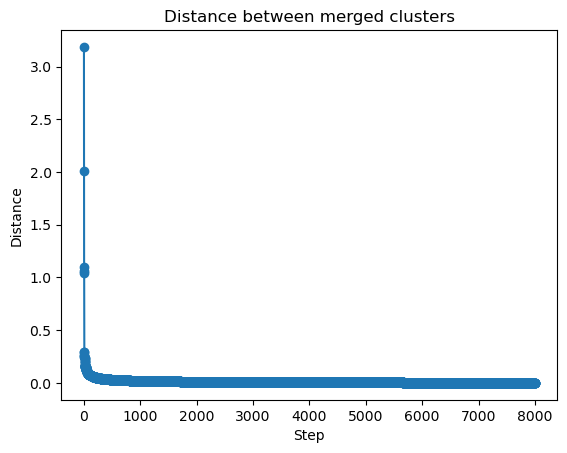

In [33]:


dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

_________________________________________________________________________________________________

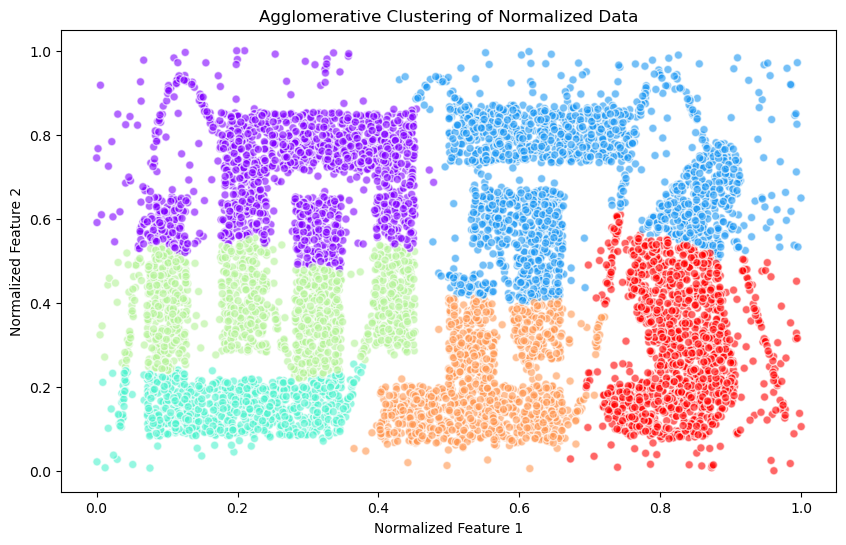

In [34]:
linkedd = linkage(dff, 'weighted', 'euclidean')
threshold = 6  # Adjust this threshold as needed
cluster_labels = fcluster(linkedd, threshold, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("Agglomerative Clustering of Normalized Data")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.show()

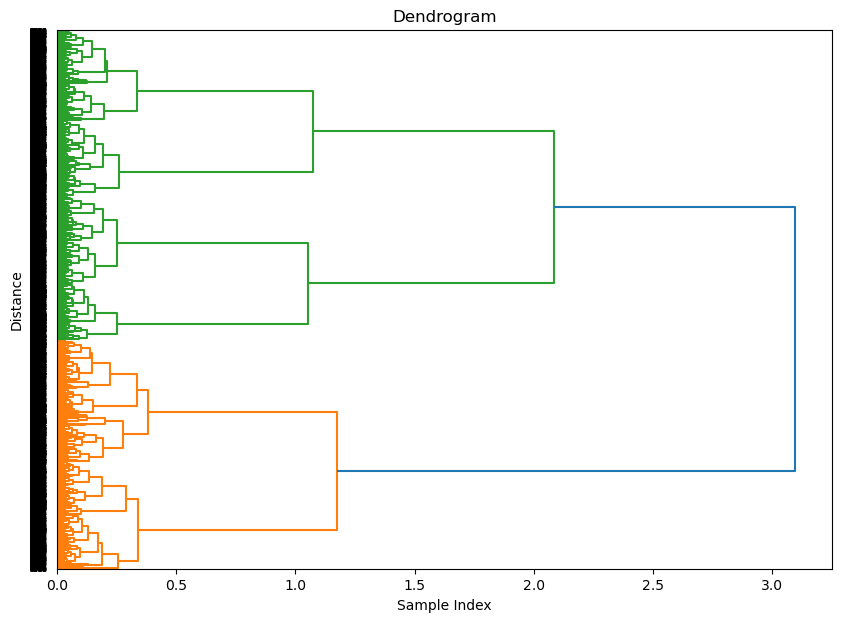

In [35]:
plt.figure(figsize=(10, 7))
dendrogram(linkedd, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [36]:
linkedd[:2000]

array([[4.48800000e+03, 6.01000000e+03, 2.55377698e-05, 2.00000000e+00],
       [2.90100000e+03, 3.51200000e+03, 3.08796082e-05, 2.00000000e+00],
       [8.89000000e+02, 1.40400000e+03, 8.86071296e-05, 2.00000000e+00],
       ...,
       [5.03400000e+03, 5.93900000e+03, 3.58587870e-03, 2.00000000e+00],
       [1.67300000e+03, 1.85600000e+03, 3.58720415e-03, 2.00000000e+00],
       [1.79100000e+03, 2.89300000e+03, 3.58771937e-03, 2.00000000e+00]])

In [37]:
dff['cluster'] = fcluster(linkedd, 6, criterion='maxclust')
dff.groupby('cluster').size()

cluster
1    1600
2    1805
3     832
4    1296
5    1129
6    1338
dtype: int64

In [38]:
dff.groupby('cluster').mean()

8000         2
cluster                    
1        0.282551  0.705358
2        0.683675  0.687487
3        0.202127  0.153603
4        0.251492  0.387554
5        0.552449  0.208344
6        0.825629  0.295509

In [39]:
dist = linkedd[:, 2]
dist

array([2.55377698e-05, 3.08796082e-05, 8.86071296e-05, ...,
       1.17333958e+00, 2.08443840e+00, 3.09416079e+00])

Text(0, 0.5, 'Distance')

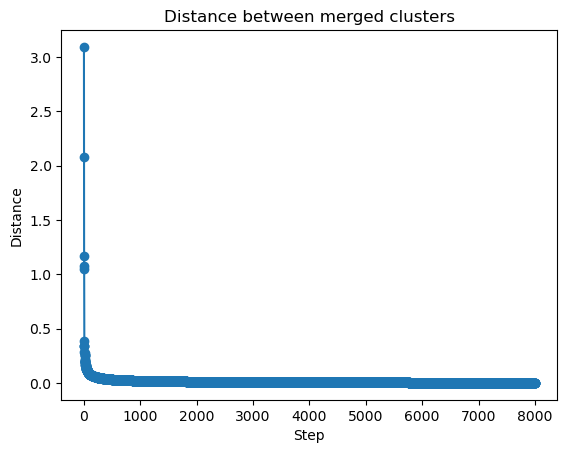

In [40]:


dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

_________________________________________________________________________________________________

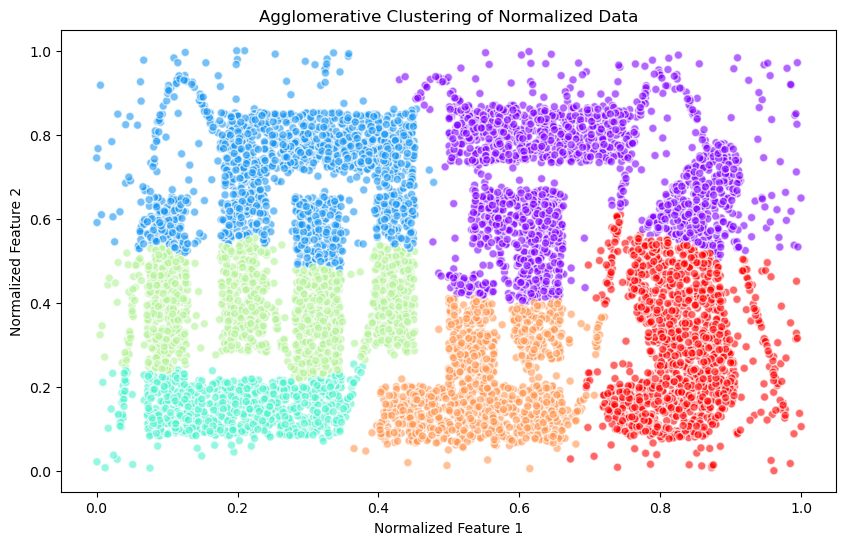

In [41]:
linkedd = linkage(dff, 'centroid', 'euclidean')
threshold = 6  # Adjust this threshold as needed
cluster_labels = fcluster(linkedd, threshold, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("Agglomerative Clustering of Normalized Data")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.show()

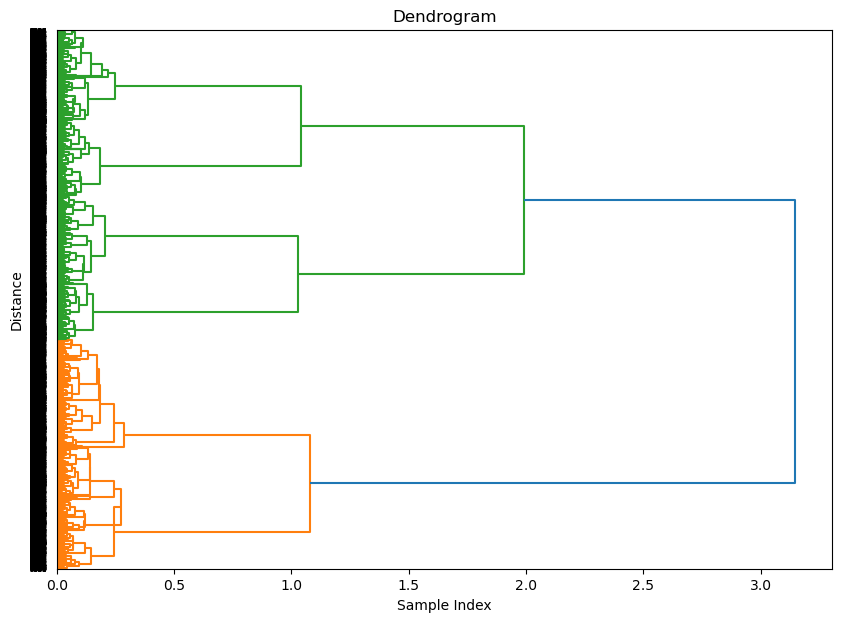

In [42]:
plt.figure(figsize=(10, 7))
dendrogram(linkedd, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [43]:
linkedd[:2000]

array([[4.48800000e+03, 6.01000000e+03, 2.55377698e-05, 2.00000000e+00],
       [2.90100000e+03, 3.51200000e+03, 3.08796082e-05, 2.00000000e+00],
       [8.89000000e+02, 1.40400000e+03, 8.86071296e-05, 2.00000000e+00],
       ...,
       [8.19200000e+03, 8.24000000e+03, 3.54368612e-03, 4.00000000e+00],
       [1.22300000e+03, 6.96900000e+03, 3.54528384e-03, 2.00000000e+00],
       [1.80000000e+01, 2.37000000e+03, 3.54731285e-03, 2.00000000e+00]])

In [44]:
dff['cluster'] = fcluster(linkedd, 6, criterion='maxclust')
dff.groupby('cluster').size()

cluster
1    1805
2    1600
3     832
4    1296
5    1129
6    1338
dtype: int64

In [45]:
dff.groupby('cluster').mean()

8000         2
cluster                    
1        0.683675  0.687487
2        0.282551  0.705358
3        0.202127  0.153603
4        0.251492  0.387554
5        0.552449  0.208344
6        0.825629  0.295509

In [46]:
dist = linkedd[:, 2]
dist

array([2.55377698e-05, 3.08796082e-05, 8.86071296e-05, ...,
       1.07759901e+00, 1.98968457e+00, 3.14529996e+00])

Text(0, 0.5, 'Distance')

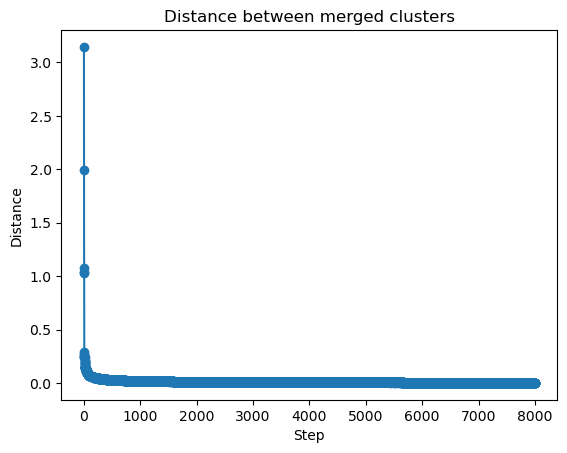

In [47]:


dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

_________________________________________________________________________________________________

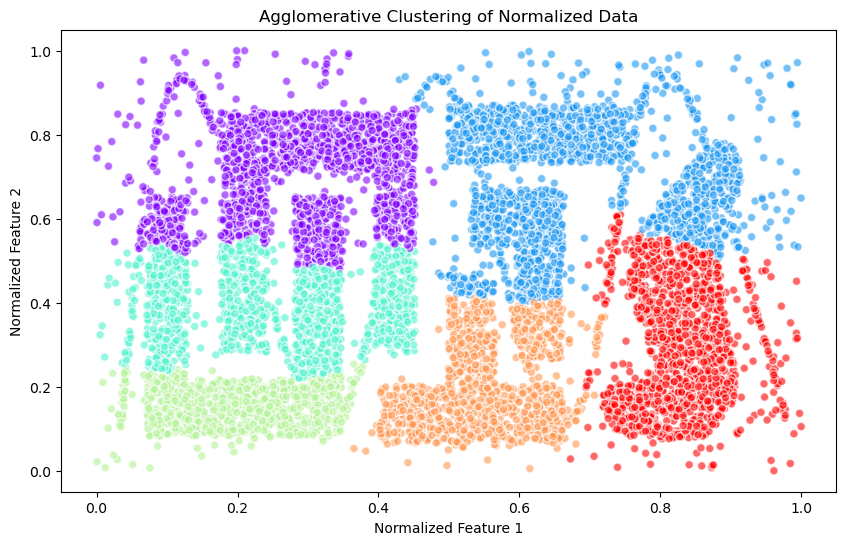

In [48]:
linkedd = linkage(dff, 'median', 'euclidean')
threshold = 6  # Adjust this threshold as needed
cluster_labels = fcluster(linkedd, threshold, criterion='maxclust')

plt.figure(figsize=(10, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.6, edgecolors='w')
plt.title("Agglomerative Clustering of Normalized Data")
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.show()

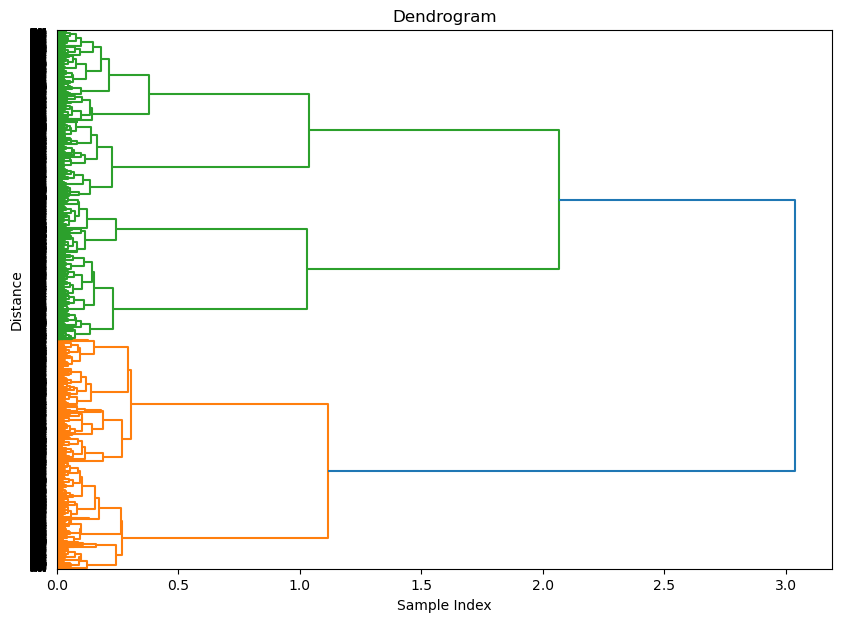

In [49]:
plt.figure(figsize=(10, 7))
dendrogram(linkedd, orientation='right')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [50]:
linkedd[:2000]

array([[4.48800000e+03, 6.01000000e+03, 2.55377698e-05, 2.00000000e+00],
       [2.90100000e+03, 3.51200000e+03, 3.08796082e-05, 2.00000000e+00],
       [8.89000000e+02, 1.40400000e+03, 8.86071296e-05, 2.00000000e+00],
       ...,
       [3.51600000e+03, 9.05000000e+03, 3.53138500e-03, 3.00000000e+00],
       [2.99600000e+03, 3.02500000e+03, 3.53359237e-03, 2.00000000e+00],
       [3.06600000e+03, 6.03400000e+03, 3.53917079e-03, 2.00000000e+00]])

In [51]:
dff['cluster'] = fcluster(linkedd, 6, criterion='maxclust')
dff.groupby('cluster').size()

cluster
1    1600
2    1805
3    1296
4     832
5    1129
6    1338
dtype: int64

In [52]:
dff.groupby('cluster').mean()

8000         2
cluster                    
1        0.282551  0.705358
2        0.683675  0.687487
3        0.251492  0.387554
4        0.202127  0.153603
5        0.552449  0.208344
6        0.825629  0.295509

In [53]:
dist = linkedd[:, 2]
dist

array([2.55377698e-05, 3.08796082e-05, 8.86071296e-05, ...,
       1.11511362e+00, 2.06811086e+00, 3.03725999e+00])

Text(0, 0.5, 'Distance')

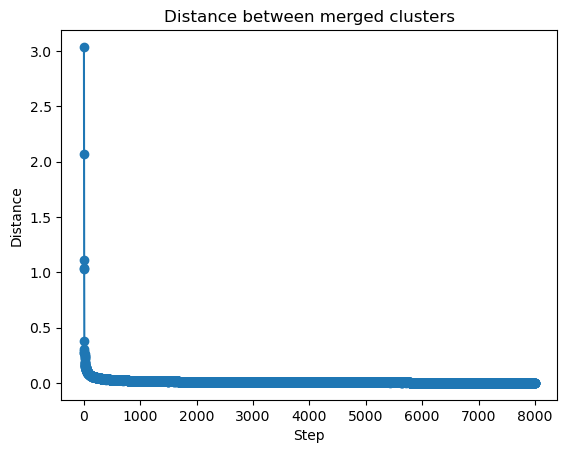

In [54]:


dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')

_________________________________________________________________________________________________